In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm,metrics
from sklearn.datasets import load_digits


<Figure size 432x288 with 0 Axes>

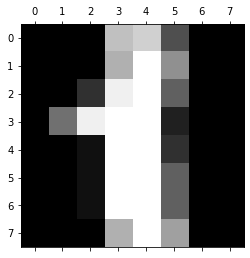

In [2]:
digits = load_digits()
# print(digits.data.shape)
# (1797, 64)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[1])
plt.show()

In [3]:
# Flatten the image
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [4]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [5]:
# predicted

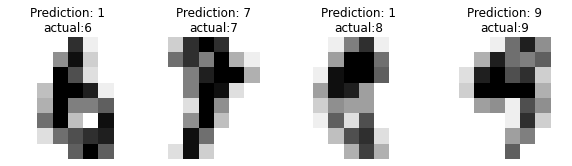

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax in axes:
    ax.set_axis_off()
# for ax, image, prediction, actual in zip(axes, X_test, predicted,):
#     ax.set_axis_off()

begin=294
for i,j in enumerate(range(begin,begin+4)):
    image = X_test[j].reshape(8, 8)
    axes[i].imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    axes[i].set_title(f"Prediction: {predicted[j]}\nactual:{y_test[j]}")

In [7]:
np.where(predicted!=y_test)

(array([104, 107, 294, 296, 316, 345, 354, 371, 401, 403, 405, 433, 469,
        470, 472, 508]),)

In [8]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.89      0.92        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.91      0.98      0.94        52
           9       0.96      0.96      0.96        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540


